# Programming Exercise 5: 
# Regularized Linear Regression and Bias v.s. Variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from scipy.io import loadmat

In [2]:
data = loadmat("ex5data1.mat")

In [3]:
X, y = data["X"], data["y"].ravel()
Xval, yval = data["Xval"], data["yval"].ravel()
Xtest, ytest = data["Xtest"], data["ytest"].ravel()

In [4]:
print(X.shape, y.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(12, 1) (12,)
(21, 1) (21,)
(21, 1) (21,)


## 1 Regularized Linear Regression

$$J(\theta) = \frac{1}{2m} (\sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^2}) +
    \frac{\lambda}{2m} (\sum_{j=1}^n{\theta^2_j})$$

$$\frac{\partial J(\theta)}{\partial \theta_j} =
    \frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j} \quad (j = 0)$$

$$\frac{\partial J(\theta)}{\partial \theta_j} =
    (\frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j}) +
    \frac{\lambda}{m}\theta_j \quad (j \neq 0)$$

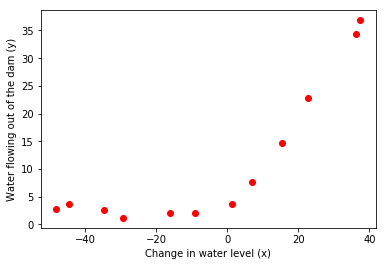

In [5]:
plt.figure()
plt.scatter(X[:, 0], y, color='red')
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.show()

In [6]:
def linearRegCostFunction(X, y, theta, lam):
    h = np.dot(X, theta) - y
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = np.dot(h, h) / (2 * X.shape[0]) + lam * np.dot(t, t) / (2 * X.shape[0])
    grad = np.dot(X.T, h) / X.shape[0] + lam * t / X.shape[0]
    return J, grad

In [7]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([1, 1])
lam = 1
J, grad = linearRegCostFunction(X_train, y, theta, lam)
print(J)  # 303.993
print(grad)  # -15.30 598.250

303.9931922202643
[-15.30301567 598.25074417]


In [8]:
def cost(theta, X, y, lam):
    h = np.dot(X, theta) - y
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = np.dot(h, h) / (2 * X.shape[0]) + lam * np.dot(t, t) / (2 * X.shape[0])
    return J


def gradient(theta, X, y, lam):
    h = np.dot(X, theta) - y
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    grad = np.dot(X.T, h) / X.shape[0] + lam * t / X.shape[0]
    return grad


def trainLinearReg(X, y, lam):
    theta = np.zeros(X.shape[1])
    res = optimize.minimize(fun=cost, x0=theta, args=(X, y, lam),
                            method='CG', jac=gradient)
    return res

In [9]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
res = trainLinearReg(X_train, y, 0)
print(res.x)

[13.08790351  0.36777923]


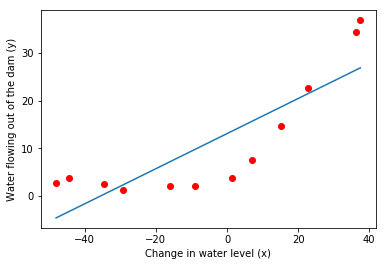

In [10]:
X_plot = np.array([np.min(X), np.max(X)])[:, np.newaxis]
X_plot_train = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
plt.figure()
plt.scatter(X[:, 0], y, color='red')
plt.plot(X_plot.ravel(), np.dot(X_plot_train, res.x))
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.show()

## 2 Bias-variance

In [11]:
def learningCurve(X, y, Xval, yval, lam):
    error_train = []
    error_val = []
    for i in range(X.shape[0]):
        res = trainLinearReg(X[:i + 1], y[:i + 1], lam)
        h = np.dot(X[:i + 1], res.x) - y[:i + 1]
        error_train.append(np.dot(h, h) / (2 * (i + 1)))
        h = np.dot(Xval, res.x) - yval
        error_val.append(np.dot(h, h) / (2 * Xval.shape[0]))
    return error_train, error_val

In [12]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
X_val = np.hstack((np.ones((Xval.shape[0], 1)), Xval))
error_train, error_val = learningCurve(X_train, y, X_val, yval, 0)
print(error_train[:5])
print(error_val[:5])

[3.944304526105059e-31, 6.409494854920721e-31, 3.286595045501874, 2.8426776893997996, 13.154048809153673]
[205.12109574547353, 110.30036610764691, 45.01023181029141, 48.368911369819564, 35.86514112418128]


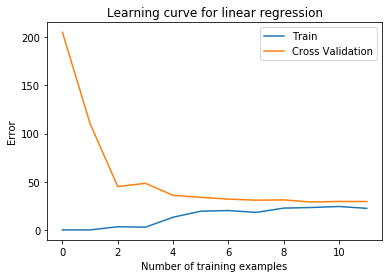

In [13]:
# underfitting
plt.figure()
plt.plot(np.arange(X.shape[0]), error_train, label="Train")
plt.plot(np.arange(X.shape[0]), error_val, label="Cross Validation")
plt.title("Learning curve for linear regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

## 3 Polynomial regression

### 3.1 Learning Polynomial Regression

In [14]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, ddof=1, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [15]:
def polyFeatures(X, p):
    X_poly = np.power(X, np.arange(1, p + 1))
    return X_poly

In [16]:
p = 8
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))

X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0], 1)), X_poly_test))

X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val))

In [17]:
print(X_poly[0])

[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


In [18]:
# lambda = 0
res = trainLinearReg(X_poly, y, 0)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, 0)
print(error_train[:5])
print(error_val[:5])

[0.0, 3.0814879110195774e-31, 1.9197824484944696e-11, 6.838961819884131e-21, 1.0149023838307588e-08]
[160.72189969184075, 160.12151033409688, 61.7550054801964, 61.92889540522957, 6.600636683537332]


In [19]:
def normalEqn(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

def learningCurve(X, y, Xval, yval, lam):
    error_train = []
    error_val = []
    for i in range(X.shape[0]):
        res = trainLinearReg(X[:i + 1], y[:i + 1], lam)
        h = np.dot(X[:i + 1], res.x) - y[:i + 1]
        error_train.append(np.dot(h, h) / (2 * (i + 1)))
        h = np.dot(Xval, res.x) - yval
        error_val.append(np.dot(h, h) / (2 * Xval.shape[0]))
    return error_train, error_val

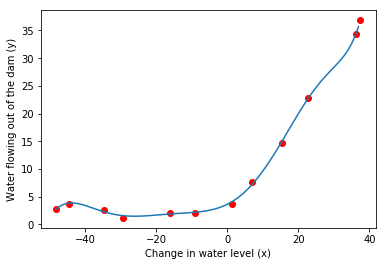

In [20]:
X_plot = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_plot_poly = polyFeatures(X_plot, p)
X_plot_poly = (X_plot_poly - mu) / sigma
X_plot_poly = np.hstack((np.ones((X_plot_poly.shape[0], 1)), X_plot_poly))
plt.figure()
plt.scatter(X[:, 0], y, color='red')
plt.plot(X_plot.ravel(), np.dot(X_plot_poly, res.x))
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.show()

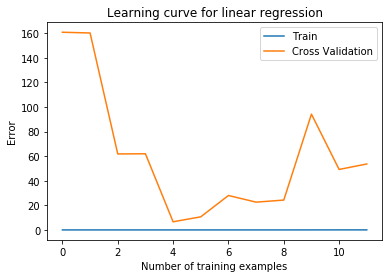

In [21]:
# overfitting
plt.figure()
plt.plot(np.arange(X_poly.shape[0]), error_train, label="Train")
plt.plot(np.arange(X_poly.shape[0]), error_val, label="Cross Validation")
plt.title("Learning curve for linear regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

### 3.2 Adjusting the regularization parameter

In [22]:
# lambda = 1
res = trainLinearReg(X_poly, y, 1)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, 1)
print(error_train[:5])
print(error_val[:5])

[9.860761315262648e-32, 0.04576893067585502, 2.9113748187321007, 1.4994125032054675, 1.1991777620429007]
[138.84677697582424, 143.5233944427066, 5.534713060163951, 6.60988292920776, 6.634111854392046]


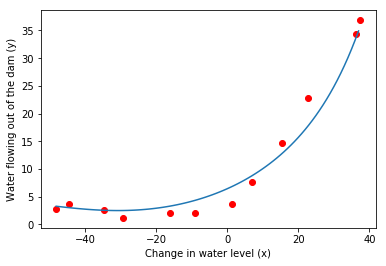

In [23]:
X_plot = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_plot_poly = polyFeatures(X_plot, p)
X_plot_poly = (X_plot_poly - mu) / sigma
X_plot_poly = np.hstack((np.ones((X_plot_poly.shape[0], 1)), X_plot_poly))
plt.figure()
plt.scatter(X[:, 0], y, color='red')
plt.plot(X_plot.ravel(), np.dot(X_plot_poly, res.x))
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.show()

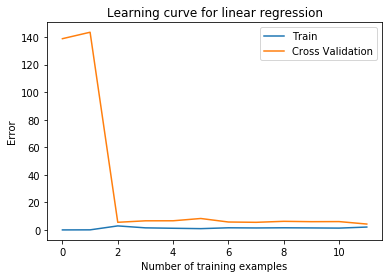

In [24]:
plt.figure()
plt.plot(np.arange(X_poly.shape[0]), error_train, label="Train")
plt.plot(np.arange(X_poly.shape[0]), error_val, label="Cross Validation")
plt.title("Learning curve for linear regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [25]:
# lambda = 100
res = trainLinearReg(X_poly, y, 100)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, 100)
print(error_train[:5])
print(error_val[:5])

[6.623549588754823e-12, 0.11410676145735979, 106.95656753214088, 121.74087885710914, 102.94946216037958]
[138.84681618320522, 144.12523056194436, 70.86326956911324, 78.37296349511686, 63.84504868416051]


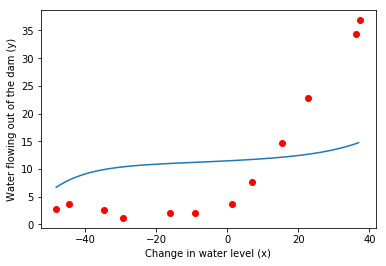

In [26]:
X_plot = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
X_plot_poly = polyFeatures(X_plot, p)
X_plot_poly = (X_plot_poly - mu) / sigma
X_plot_poly = np.hstack((np.ones((X_plot_poly.shape[0], 1)), X_plot_poly))
plt.figure()
plt.scatter(X[:, 0], y, color='red')
plt.plot(X_plot.ravel(), np.dot(X_plot_poly, res.x))
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.show()

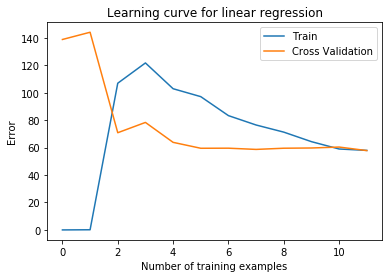

In [27]:
# underfitting
plt.figure()
plt.plot(np.arange(X_poly.shape[0]), error_train, label="Train")
plt.plot(np.arange(X_poly.shape[0]), error_val, label="Cross Validation")
plt.title("Learning curve for linear regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

### 3.3 Selecting $\lambda$ using a cross validation set

In [28]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = []
    error_val = []
    for i in range(len(lambda_vec)):
        res = trainLinearReg(X, y, lambda_vec[i])
        h = np.dot(X, res.x) - y
        error_train.append(np.dot(h, h) / (2 * X.shape[0]))
        h = np.dot(Xval, res.x) - yval
        error_val.append(np.dot(h, h) / (2 * Xval.shape[0]))
    return lambda_vec, error_train, error_val

In [29]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)
print(error_train[:5])
print(error_val[:5])

[0.028891120344203575, 0.1127910504478676, 0.17089802743788232, 0.2214943389544831, 0.28184063061510095]
[53.61530385310425, 9.859672495192026, 16.29092055083894, 16.946994401274956, 12.831020297021785]


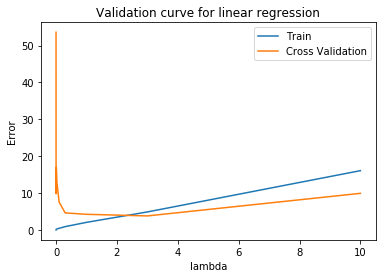

In [30]:
plt.figure()
plt.plot(lambda_vec, error_train, label="Train")
plt.plot(lambda_vec, error_val, label="Cross Validation")
plt.title("Validation curve for linear regression")
plt.xlabel("lambda")
plt.ylabel("Error")
plt.legend()
plt.show()

### 3.4 Computing test set error

In [31]:
lam = lambda_vec[np.argmin(error_val)]
print(lam)

3.0


In [32]:
res = trainLinearReg(X_poly, y, lam)
h = np.dot(X_poly_test, res.x) - ytest
error_test = np.dot(h, h) / (2 * X_poly_test.shape[0])
print(error_test)

3.8598878145358375
